In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
# import csv, read csv
csv_path = "JBEI_ABF_DIVA_Cost_FY18 - final.csv"
csv_data_df = pd.read_csv(csv_path)
csv_data_df.head()

,Quarter,Date,DIVA User,DIVA Project PI,JBEI-ABF DIVA Design link or Name,Project,DIVA Service,Number Rn/Construct/Sample,Cost,Project ID-Activity Code,Diva Team,Hours,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,FY2017-Q4,8/7/17,ggoyal@lbl.gov,njhillson@lbl.gov,https://diva.jbei.org/design/1543,Kalion SBV,Full DNA construction,13,$664.91,105349-002,GG,0.00,NaN,NaN,NaN
1,FY2017-Q4,8/31/17,constancebailey@lbl.gov,jheady@lbl.gov,NaN,NaN,DNA seq,9,$75.24,103768-001,NK,1.02,NaN,NaN,NaN
2,FY2017-Q4,8/31/17,akothari@lbl.gov,amukhopadhyay@lbl.gov,NaN,NaN,DNA seq,2,$16.72,101544-035,NK,0.23,NaN,NaN,NaN
3,FY2017-Q4,9/11/17,jblakehedges@lbl.gov,jheady@lbl.gov,NaN,NaN,DNA seq,10,$83.60,103768-001,NK,1.14,NaN,NaN,NaN
4,FY2017-Q4,9/14/17,azargar@lbl.gov,syuzawa@lbl.gov,NaN,NaN,DNA seq,22,$183.92,103768-001,NK,2.50,NaN,NaN,NaN


In [3]:
csv_data_df.count()

Quarter                              166
Date                                 166
DIVA User                            166
DIVA Project PI                      166
JBEI-ABF DIVA Design link or Name     60
Project                               60
DIVA Service                         166
Number Rn/Construct/Sample           166
Cost                                 166
Project ID-Activity Code             166
Diva Team                            166
Hours                                166
Unnamed: 12                            0
Unnamed: 13                            0
Unnamed: 14                            0
dtype: int64

In [4]:
csv_data_df.dtypes

Quarter                               object
Date                                  object
DIVA User                             object
DIVA Project PI                       object
JBEI-ABF DIVA Design link or Name     object
Project                               object
DIVA Service                          object
Number Rn/Construct/Sample             int64
Cost                                  object
Project ID-Activity Code              object
Diva Team                             object
Hours                                float64
Unnamed: 12                          float64
Unnamed: 13                          float64
Unnamed: 14                          float64
dtype: object

In [5]:
# df2=csv_data_df.convert_objects(convert_numeric=True)
csv_data_df['Cost']=csv_data_df['Cost'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
csv_data_df.dtypes

Quarter                               object
Date                                  object
DIVA User                             object
DIVA Project PI                       object
JBEI-ABF DIVA Design link or Name     object
Project                               object
DIVA Service                          object
Number Rn/Construct/Sample             int64
Cost                                 float64
Project ID-Activity Code              object
Diva Team                             object
Hours                                float64
Unnamed: 12                          float64
Unnamed: 13                          float64
Unnamed: 14                          float64
dtype: object

In [7]:
csv_data_df.columns

Index(['Quarter', 'Date', 'DIVA User ', 'DIVA Project PI',
       'JBEI-ABF DIVA Design link or Name', 'Project ', 'DIVA Service',
       'Number Rn/Construct/Sample', 'Cost', 'Project ID-Activity Code',
       'Diva Team', 'Hours', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [8]:
csv_data_grouped = csv_data_df.groupby(["DIVA Project PI","Quarter","Project ID Activity Code"])
csv_data_grouped.head()

KeyError: 'Project ID Activity Code'

In [41]:
total_cost = csv_data_grouped['Cost'].sum()
total_cost

DIVA Project PI        Quarter    Project ID Activity Code
AMUKHOPADHYAY@lbl.gov  FY2017-Q4  101544-035                    16.72
HScheller@lbl.gov      FY2018-Q1  100822-013                     8.36
HarryBeller@lbl.gov    FY2018-Q1  105129-001                   284.24
                       FY2018-Q2  100822-046                    25.08
                                  100822-053                    16.72
amukhopadhyay@lbl.gov  FY2017-Q4  101544-035                     0.00
                       FY2018-Q1  101544-035                   108.68
azargar@lbl.gov        FY2017-Q4  103768-001                   183.92
                       FY2018-Q1  100822-042                   100.32
                                  103768-001                   142.12
cjpetzold@lbl.gov      FY2017-Q4  100822-041                   203.12
                       FY2018-Q1  100822-041                   675.93
hrbeller@lbl.gov       FY2018-Q1  100822-018                   217.36
                               

In [42]:
total_cost[0]

16.72

In [43]:
total_cost_df = pd.DataFrame(total_cost).reset_index()
total_cost_df.head()

,DIVA Project PI,Quarter,Project ID Activity Code,Cost
0,AMUKHOPADHYAY@lbl.gov,FY2017-Q4,101544-035,16.72
1,HScheller@lbl.gov,FY2018-Q1,100822-013,8.36
2,HarryBeller@lbl.gov,FY2018-Q1,105129-001,284.24
3,HarryBeller@lbl.gov,FY2018-Q2,100822-046,25.08
4,HarryBeller@lbl.gov,FY2018-Q2,100822-053,16.72


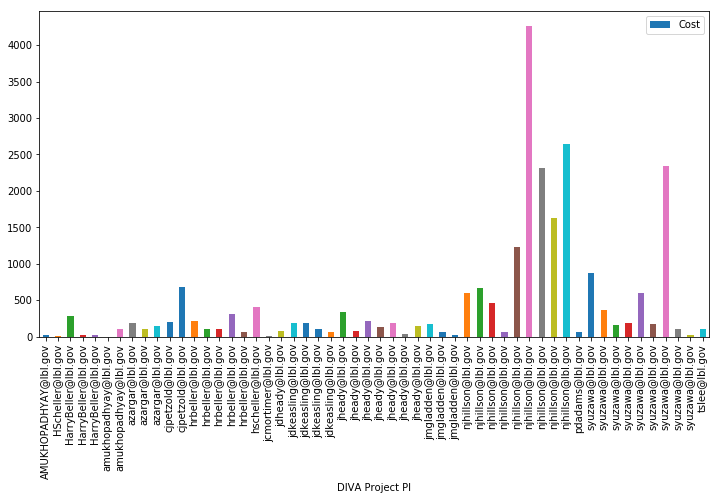

In [46]:
total_cost_df.plot(kind="bar",x="DIVA Project PI",y="Cost", figsize=(12,6))